In [148]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [149]:
Mauc=pd.read_csv("auction_csv/monet2_auc.csv")

In [150]:
Vauc=pd.read_csv("auction_csv/Vangoh_auc.csv")

In [151]:
Hauc=pd.read_csv("auction_csv/hopper_auc.csv")

In [152]:
def get_artist(name, data):
    alist=[]
    for i in data.index:
        alist.append(name)
    data["Artist"]=alist

In [153]:
get_artist("Claude Monet", Mauc)

In [154]:
get_artist("Vincent Van Gogh", Vauc)

In [155]:
get_artist("Eward Hopper", Hauc)

In [156]:
frames = [Mauc, Vauc, Hauc]

whole_auc = pd.concat(frames,ignore_index=True)

In [157]:
whole_auc=whole_auc.drop(["Size"],axis=1)

## Clean and encode the data

In [158]:
import copy
X=copy.deepcopy(whole_auc)

In [159]:
import numpy as np
for i in X.index:
    if X["Auction_Lot"][i] is np.nan:
        X=X.drop([i])

In [160]:
def get_transform(data,col):
    le = preprocessing.LabelEncoder()
    le.fit(data[col])
    data[col]=le.transform(data[col])

In [161]:
get_transform(X,"Signature")
get_transform(X,"Medium")
get_transform(X,"Auction_House")
get_transform(X,"Auction_Date")
get_transform(X,"sold_status")
get_transform(X,"Title")
get_transform(X,"Artist")
get_transform(X,"created_date")

In [162]:
X["Auction_Lot"]=X["Auction_Lot"].str.replace("A","")
X["Auction_Lot"]=X["Auction_Lot"].str.replace("a","")
X["Auction_Lot"]=X["Auction_Lot"].str.replace("b","")
X["Auction_Lot"]=X["Auction_Lot"].str.replace("B","")
X["Auction_Lot"]=X["Auction_Lot"].str.replace("E","")
X["Auction_Lot"]=X["Auction_Lot"].str.replace("D","")
X["Auction_Lot"]=X["Auction_Lot"].str.replace("C","")
X["Auction_Lot"]=X["Auction_Lot"].str.replace(" c","")
X["Auction_Lot"]=X["Auction_Lot"].str.replace("\xa0","")

In [163]:
X["Low_Estimate_price"]=X["Low_Estimate_price"].astype(int)
X["Hammer_Price"]=X["Hammer_Price"].astype(int)
X["High_Estimate_price"]=X["High_Estimate_price"].astype(int)
X["Auction_Lot"]=X["Auction_Lot"].astype(int)

In [164]:
X1=X.drop(["Hammer_Price","sold_status"],axis=1)

In [165]:
Y1=X["Hammer_Price"]

In [166]:
Y2=X["sold_status"]

In [167]:
X2=X.drop(["sold_status","Hammer_Price"],axis=1)

## test models on a small dataset first

In [189]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.3,random_state=0)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.3,random_state=0)

In [169]:
from sklearn import tree #decision tree to predcit whether it's sold or not

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X2_train, Y2_train)

In [170]:
Y2_pred = clf.predict(X2_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y2_test, Y2_pred)

0.8925925925925926

In [171]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(Y2_test, Y2_pred),
    columns=['Predicted Not sold', 'Predicted sold'],
    index=['True Not sold', 'True sold']
)

Predicted Not sold  Predicted sold
True Not sold                   6              13
True sold                      16             235

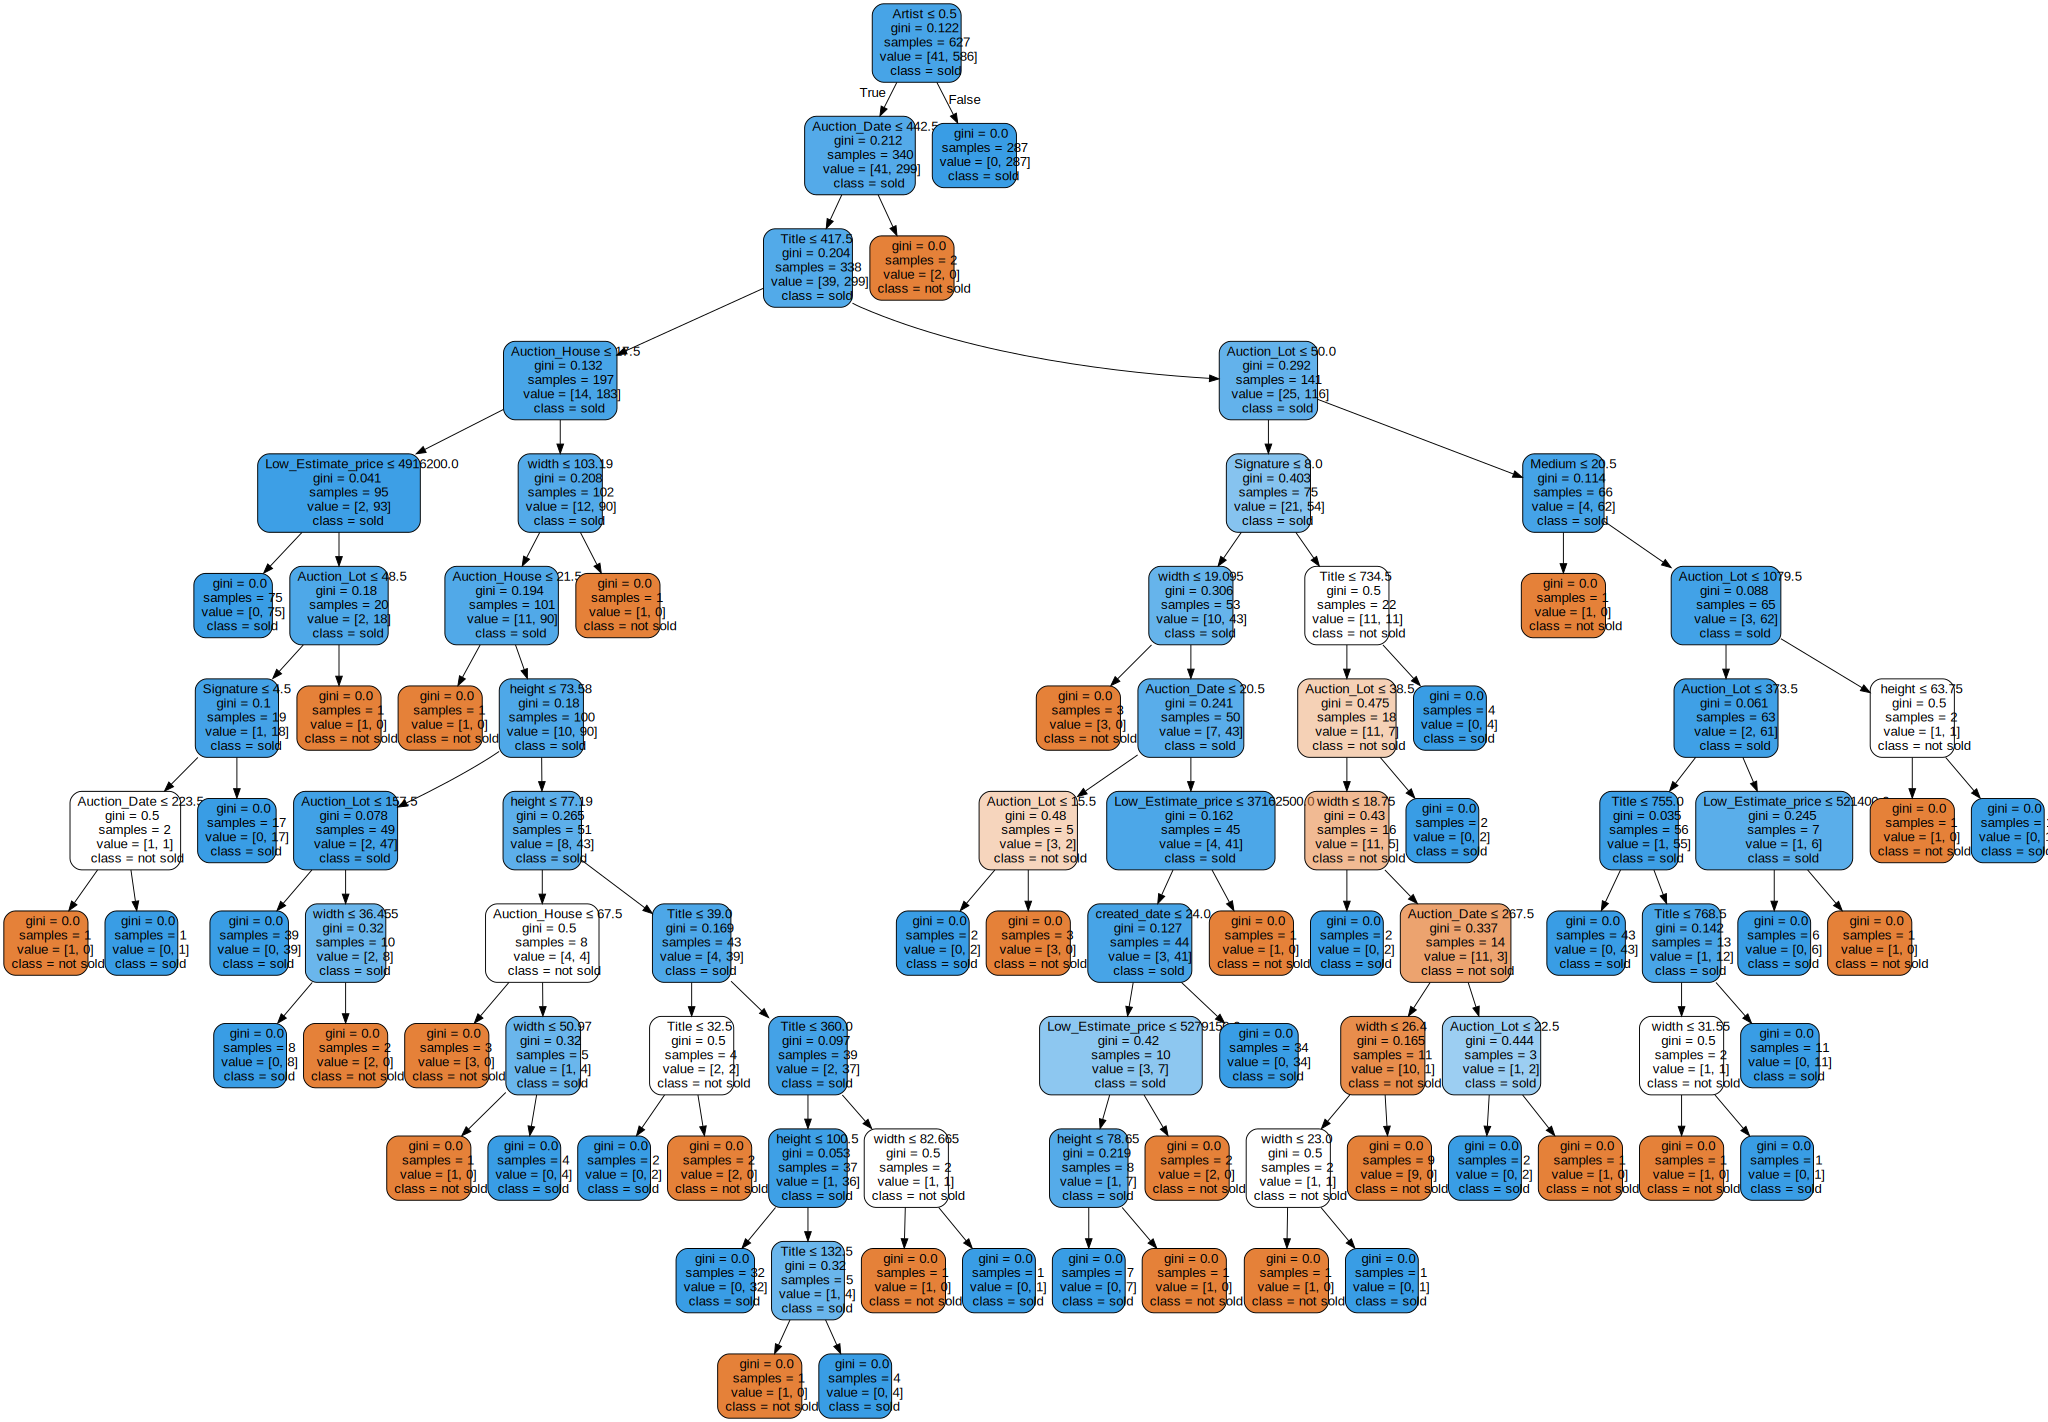

In [172]:
import graphviz # feature artist gained most infomation the is auction date and title
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X2.columns,  
                      class_names=["not sold","sold"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [276]:
#linear regression to predict hammer price
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
reg = LinearRegression().fit(X1_train, Y1_train)

In [191]:
poly=PolynomialFeatures(degree=2)
X1_train_=poly.fit_transform(X1_train)
X1_test_=poly.fit_transform(X1_test)
reg = LinearRegression().fit(X1_train_, Y1_train)

In [280]:
reg.score(X1_train, Y1_train)

0.48593131870574857

In [281]:
reg.score(X1_test, Y1_test)#not good may due to small size

0.49384070834198068

In [277]:
Y1_pred = reg.predict(X1_test)

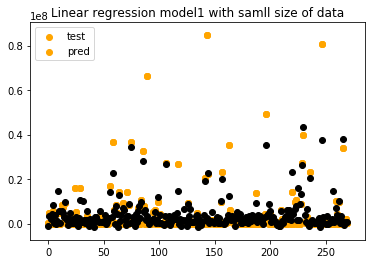

In [334]:
plt.scatter(range(Y1_test.size),Y1_test,color="orange")
plt.scatter(range(Y1_pred.size),Y1_pred,color="black")
plt.title("Linear regression model1 with samll size of data")
plt.legend(("test","pred"))
plt.show()

In [195]:
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(Y1_test, Y1_pred)

reg_mse

1153982767597382.2

In [196]:
import math

math.sqrt(reg_mse)

33970321.86478931

## Try on more data

In [54]:
Rauc=pd.read_csv("auction_csv/Renoir_auc.csv")

In [55]:
Degas_auc=pd.read_csv("auction_csv/Degas_auc.csv")

In [58]:
Pauc=pd.read_csv("auction_csv/Pissarro_auc.csv")

In [59]:
get_artist("Auguste Renoir", Rauc)

In [60]:
get_artist("Edgar Degas", Degas_auc)

In [61]:
get_artist("Camille Pissarro", Pauc)

# clean data and get features encoded

In [62]:
for i in Rauc.index:
     if Rauc["Hammer_Price"][i]=="awaiting result":
            Rauc=Rauc.drop([i])

In [63]:
for i in Rauc.index:
     if Rauc["Hammer_Price"][i]=="not communicated":
            Rauc=Rauc.drop([i])

In [64]:
for i in Degas_auc.index:
     if Degas_auc["Hammer_Price"][i]=="not communicated":
            Degas_auc=Degas_auc.drop([i])

In [65]:
for i in Pauc.index:
     if Pauc["Hammer_Price"][i]=="not communicated":
            Pauc=Pauc.drop([i])

In [66]:
frame2 = [Mauc, Vauc, Hauc,Rauc,Degas_auc,Pauc]

whole_auc2 = pd.concat(frame2,ignore_index=True)

In [67]:
whole_auc2["Hammer_Price"]=whole_auc2["Hammer_Price"].astype(int)

## Auction house hold most auction in the dataset

In [141]:
import collections 
auctionh=collections.Counter(whole_auc2["Auction_House"])

In [143]:
auctionh.most_common()

[("Sotheby's New York", 767),
 ("Christie's New York, Rockefeller Center", 742),
 ("Sotheby's London, New Bond Street", 540),
 ("Christie's London, King Street", 455),
 ("Christie's Paris", 106),
 ('Artcurial', 49),
 ('Galerie Koller, AG, Zurich', 42),
 ("Sotheby's Paris", 35),
 ('Millon & Associes', 34),
 ('Bonhams Bond Street', 33),
 ('Tajan, Paris', 24),
 ("Freeman's", 23),
 ('Claude Aguttes', 22),
 ('Piasa', 22),
 ("Christie's London, South Kensington", 21),
 ('Heritage Auctions', 20),
 ('Rago Arts and Auction Center', 18),
 ('Galerie Kornfeld and Cie', 17),
 ('Bonhams New York', 15),
 ('Matsart Auctioneers & Appraisers', 15),
 ('Mainichi Auction Inc.', 13),
 ('Christie\'s New York, "East"', 13),
 ('Est-Ouest Auctions Co., Ltd.', 12),
 ('Shinwa Art Auction', 11),
 ('Swann Galleries', 10),
 ("Christie's Hong Kong", 10),
 ('Cornette De Saint Cyr', 10),
 ('Galerie Fischer Auktionen AG', 10),
 ('Grisebach', 10),
 ("Sotheby's New York, Arcade", 10),
 ('Hotel Des Ventes De Monte-Carlo', 

## see the top 10 high and low hammer price for artworks in the dataset

In [363]:
whole_auc2.nlargest(5,"Hammer_Price")

Artist                  Auction_Date  \
605      Eward Hopper  11/13/2018\n                   
40       Claude Monet  05/08/2018\n                   
600  Vincent Van Gogh  05/15/1990\n                   
96       Claude Monet  11/16/2016\n                   
498  Vincent Van Gogh  11/13/2017\n                   

                               Auction_House Auction_Lot  Hammer_Price  \
605  Christie's New York, Rockefeller Center         12B      91875000   
40   Christie's New York, Rockefeller Center          10      84687500   
600  Christie's New York, Rockefeller Center          21      82500000   
96   Christie's New York, Rockefeller Center          9B      81447500   
498  Christie's New York, Rockefeller Center         28A      81312500   

     High_Estimate_price  Low_Estimate_price        Medium  \
605            100000000            70000000  Oil / Canvas   
40                     0                   0  Oil / Canvas   
600             50000000            40000000  Oil / Canvas   
96                     0                   0  Oil / Canvas   
498                    0                   0  Oil / Canvas   

              Signature             Size                     Title  \
605  Signed Lower Right    81.28 x 96.52                 Chop Suey   
40              Stamped  160.02 x 180.04        Nymphéas en fleur    
600              Signed              NaN    Portrait du Dr. Gachet   
96    Signed Lower Left    72.72 x 92.08                     Meule   
498         Unavailable              NaN  Laboureur dans un champ    

    created_date  height sold_status   width  
605         1929   96.52        sold   81.28  
40       1914-17  180.04        sold  160.02  
600         1890   56.90        sold   66.04  
96          1891   92.08        sold   72.72  
498         1889   64.77        sold   50.50

In [364]:
whole_auc2.nsmallest(5,"Hammer_Price")# of course because they not sold 

Artist                  Auction_Date  \
4   Claude Monet  02/27/2019\n                   
5   Claude Monet  02/27/2019\n                   
15  Claude Monet  11/12/2018\n                   
20  Claude Monet  11/11/2018\n                   
28  Claude Monet  06/20/2018\n                   

                              Auction_House Auction_Lot  Hammer_Price  \
4            Christie's London, King Street          11             0   
5            Christie's London, King Street          13             0   
15                       Sotheby's New York          42             0   
20  Christie's New York, Rockefeller Center         19A             0   
28           Christie's London, King Street          26             0   

    High_Estimate_price  Low_Estimate_price        Medium          Signature  \
4                     0                   0  Oil / Canvas            Stamped   
5               7875000             5250000  Oil / Canvas            Stamped   
15              2000000             1500000  Oil / Canvas  Signed Lower Left   
20             18000000            12000000  Oil / Canvas   Signed and Dated   
28              1575000             1050000  Oil / Canvas        Unavailable   

               Size                                   Title created_date  \
4   199.00 x 180.00  Saule pleureur et bassin aux nymphéas     1916-1919   
5     99.50 x 87.50                                    Iris    1924-1925   
15    18.11 x 38.43                      PRUNES ET ABRICOTS      1882-85   
20    81.28 x 64.77                   L’Escalier à Vétheuil         1881   
28    50.00 x 61.00                      Sandviken, Norvège         1895   

    height sold_status   width  
4   180.00    not sold  199.00  
5    87.50    not sold   99.50  
15   38.43    not sold   18.11  
20   64.77    not sold   81.28  
28   61.00    not sold   50.00

In [223]:
import copy
XX=copy.deepcopy(whole_auc2)

In [224]:
import numpy as np
for i in XX.index:
    if XX["Auction_Lot"][i] is np.nan:
        XX=XX.drop(i)

In [225]:
get_transform(XX,"Signature")
get_transform(XX,"Medium")
get_transform(XX,"Auction_House")
get_transform(XX,"Auction_Date")
get_transform(XX,"sold_status")
get_transform(XX,"Title")
get_transform(XX,"Artist")
get_transform(XX,"created_date")

In [226]:
XX=XX.drop(["Size"],axis=1)

In [227]:
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("A","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("a","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("b","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("B","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("E","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("D","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("C","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace(" c","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("\xa0","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("is","")
XX["Auction_Lot"]=XX["Auction_Lot"].str.replace("i","")

In [228]:
XX["Low_Estimate_price"]=XX["Low_Estimate_price"].astype(int)
XX["Hammer_Price"]=XX["Hammer_Price"].astype(int)
XX["High_Estimate_price"]=XX["High_Estimate_price"].astype(int)
XX["Auction_Lot"]=XX["Auction_Lot"].astype(int)

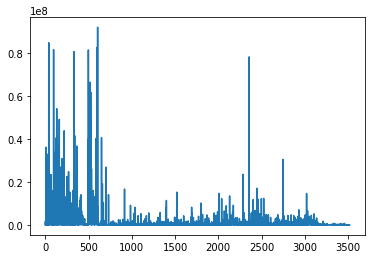

In [229]:
plt.plot(XX["Hammer_Price"])# see the distribution of hammer price not normal distribution
plt.show()

In [230]:
X11=XX.drop(["Hammer_Price","sold_status"],axis=1)

In [362]:
len(X111)

3150

In [231]:
Y11=XX["Hammer_Price"]

In [232]:
Y22=XX["sold_status"]

## Linear regression to predict hammer price

In [255]:
X11_train, X11_test, Y11_train, Y11_test = train_test_split(X11,Y11,test_size=0.3,random_state=0)
X22_train, X22_test, Y22_train, Y22_test = train_test_split(X11,Y22,test_size=0.3,random_state=0)
#X111_train, X111_test, Y111_train, Y111_test = train_test_split(X111,Y111,test_size=0.3,random_state=0)

In [355]:
reg2 = LinearRegression(normalize=True).fit(X11_train, Y11_train)

In [341]:
#poly=PolynomialFeatures(degree=2) work not well
#X11_train_=poly.fit_transform(X11_train)
#X11_test_=poly.fit_transform(X11_test)
#reg2 = LinearRegression().fit(X11_train_, Y11_train)

In [356]:
reg2.score(X11_test, Y11_test)# bad score

0.44310160163146811

In [357]:
Y11_pred = reg2.predict(X11_test)

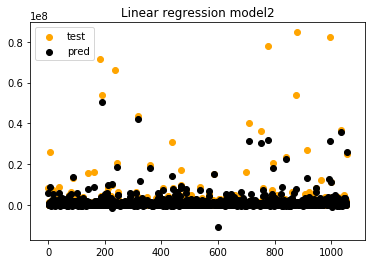

In [401]:
plt.scatter(range(Y11_test.size),Y11_test,color="orange")
plt.scatter(range(Y11_pred.size),Y11_pred,color="black")
plt.title("Linear regression model2")
plt.legend(("test","pred"))
plt.show()

## Find many zero value in high estimate price for renoir and pissaro, drop those rows and try linear regression again 

In [263]:
X111=copy.deepcopy(XX)
for i in X111.index:
    if X111["High_Estimate_price"][i] ==0:
        X111=X111.drop([i])
        

In [243]:
#find many zero in low estimate price for renoir and pissaro drop those rows and try linear regression again 
for i in X111.index:
    if X111["Low_Estimate_price"][i] ==0:
        X111=X111.drop([i])

In [264]:
Y111=X111["Hammer_Price"]


In [265]:
X111=X111.drop(["Hammer_Price","sold_status"],axis=1)
X111_train, X111_test, Y111_train, Y111_test = train_test_split(X111,Y111,test_size=0.3,random_state=0)

In [311]:
reg3 = LinearRegression(normalize=True).fit(X111_train, Y111_train)

In [312]:
reg3.score(X111_test, Y111_test)#better score

0.80211692892589292

## Try polynomial regression

In [313]:
poly=PolynomialFeatures(degree=2)# try polynomial 
X111_train_=poly.fit_transform(X111_train)
X111_test_=poly.fit_transform(X111_test)
reg3_ = LinearRegression().fit(X111_train_, Y111_train)

In [314]:
reg3_.score(X111_test_, Y111_test)#no improvement 

0.7733558155845367

In [316]:
Y111_pred = reg3.predict(X111_test)
Y111_pred_ = reg3_.predict(X111_test_)

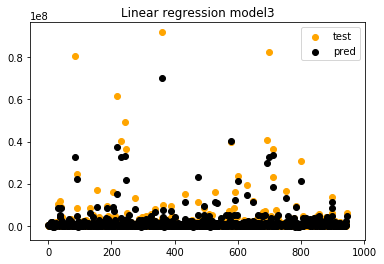

In [348]:
plt.scatter(range(Y111_test.size),Y111_test,color="orange")
plt.scatter(range(Y111_pred.size),Y111_pred,color="black")
plt.title("Linear regression model3")
plt.legend(("test","pred"))
plt.show()

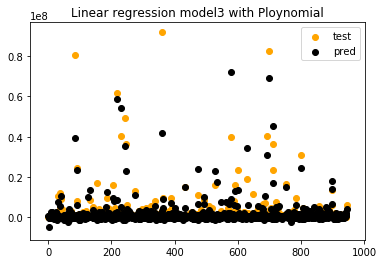

In [318]:
plt.scatter(range(Y111_test.size),Y111_test,color="orange")
plt.scatter(range(Y111_pred_.size),Y111_pred_,color="black")
plt.title("Linear regression model3 with Ploynomial")
plt.legend(("test","pred"))
plt.show()

## Removed rows contains 0 in Hammer price. 0 in Hammer price represents not sold. 
## Removing them is to say to predict piece's hammer price on the premise that they are all  sold
## Performance got better but should consider to offer close price for art piece not sold. Not a pratical model

In [440]:
Xnozero=copy.deepcopy(XX)
for i in Xnozero.index:
        if Xnozero["Hammer_Price"][i] == 0:
            Xnozero=Xnozero.drop([i])

In [443]:
for i in Xnozero.index:
    if Xnozero["High_Estimate_price"][i] ==0:
        Xnozero=Xnozero.drop([i])

In [444]:
X0=Xnozero.drop(["Hammer_Price","sold_status"],axis=1)
Ynozero=Xnozero["Hammer_Price"]

In [454]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0,Ynozero,test_size=0.3,random_state=0)

In [455]:
reg4 = LinearRegression(normalize=True).fit(X0_train, Y0_train)

In [456]:
reg4.score(X0_test, Y0_test)# bad score

0.83873451617124439

In [457]:
Y0_pred = reg4.predict(X0_test)

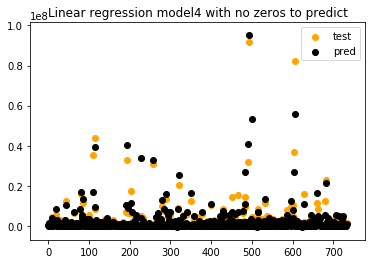

In [458]:
plt.scatter(range(Y0_test.size),Y0_test,color="orange")
plt.scatter(range(Y0_pred.size),Y0_pred,color="black")
plt.title("Linear regression model4 with no zeros to predict")
plt.legend(("test","pred"))
plt.show()

In [127]:
from sklearn.metrics import mean_squared_error
reg3_mse = mean_squared_error(Y111_test, Y111_pred)#smaller mse comparing to model2 but still quite lager in numbers

reg3_mse

8574316814037.8115

In [319]:
reg33_mse = mean_squared_error(Y111_test, Y111_pred_)

reg33_mse

9820542154954.3359

In [460]:
reg4_mse = mean_squared_error(Y0_test, Y0_pred)

reg4_mse

6072578786936.5098

In [89]:
reg2_mse = mean_squared_error(Y11_test, Y11_pred)

reg2_mse

25270072902162.605

In [134]:
from sklearn.model_selection import cross_val_score
r3scores = cross_val_score(reg3, X111_test, Y111_test, scoring="neg_mean_squared_error",cv=5)
print(r3scores) 
print(np.mean(r3scores))

[ -7.14659314e+12  -1.55010616e+13  -3.98728063e+12  -8.95524571e+12
  -2.09713428e+12]
-7.53746307256e+12


In [461]:
import math 
print(math.sqrt(reg2_mse))
print(math.sqrt(reg3_mse))
print(math.sqrt(reg33_mse))
print(math.sqrt(reg4_mse))

5026934.742182616
2928193.438630346
3133774.4263035804
2464260.292042322


In [323]:
from sklearn.metrics import r2_score
r2_score(Y111_test, Y111_pred)#model3 r2 #after cleaning lots of 0 in high estimate, model improved but not perfect

0.80211692892589292

In [93]:
r2_score(Y11_test, Y11_pred)#model2   r2

0.44310160163117074

In [94]:
coe2=pd.DataFrame(list(zip(X11_train.columns, np.transpose(reg2.coef_))))#see the coefficients 
coe2.sort_values(by=[1])

0              1
11                width  -21601.864955
7             Signature  -18348.862700
6                Medium   -1190.309594
2         Auction_House   -1187.767206
9          created_date    -847.556122
8                 Title     -90.719450
3           Auction_Lot      -5.583018
1          Auction_Date      -5.230947
5    Low_Estimate_price      -1.053685
4   High_Estimate_price       1.455002
10               height   27108.102542
0                Artist  149933.470228

In [95]:
coe3=pd.DataFrame(list(zip(X111_train.columns, np.transpose(reg3.coef_))))# Artists is the bigest positive coefficient in both mddelw
coe3.sort_values(by=[1])

0             1
7             Signature -18296.683746
11                width -11636.952944
6                Medium  -1385.515174
9          created_date  -1070.636868
1          Auction_Date   -194.438660
8                 Title    -95.692960
5    Low_Estimate_price     -0.457659
3           Auction_Lot     -0.323398
4   High_Estimate_price      1.017491
2         Auction_House   1170.420259
10               height   9545.346971
0                Artist  83864.480231

/Users/zhangruyue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

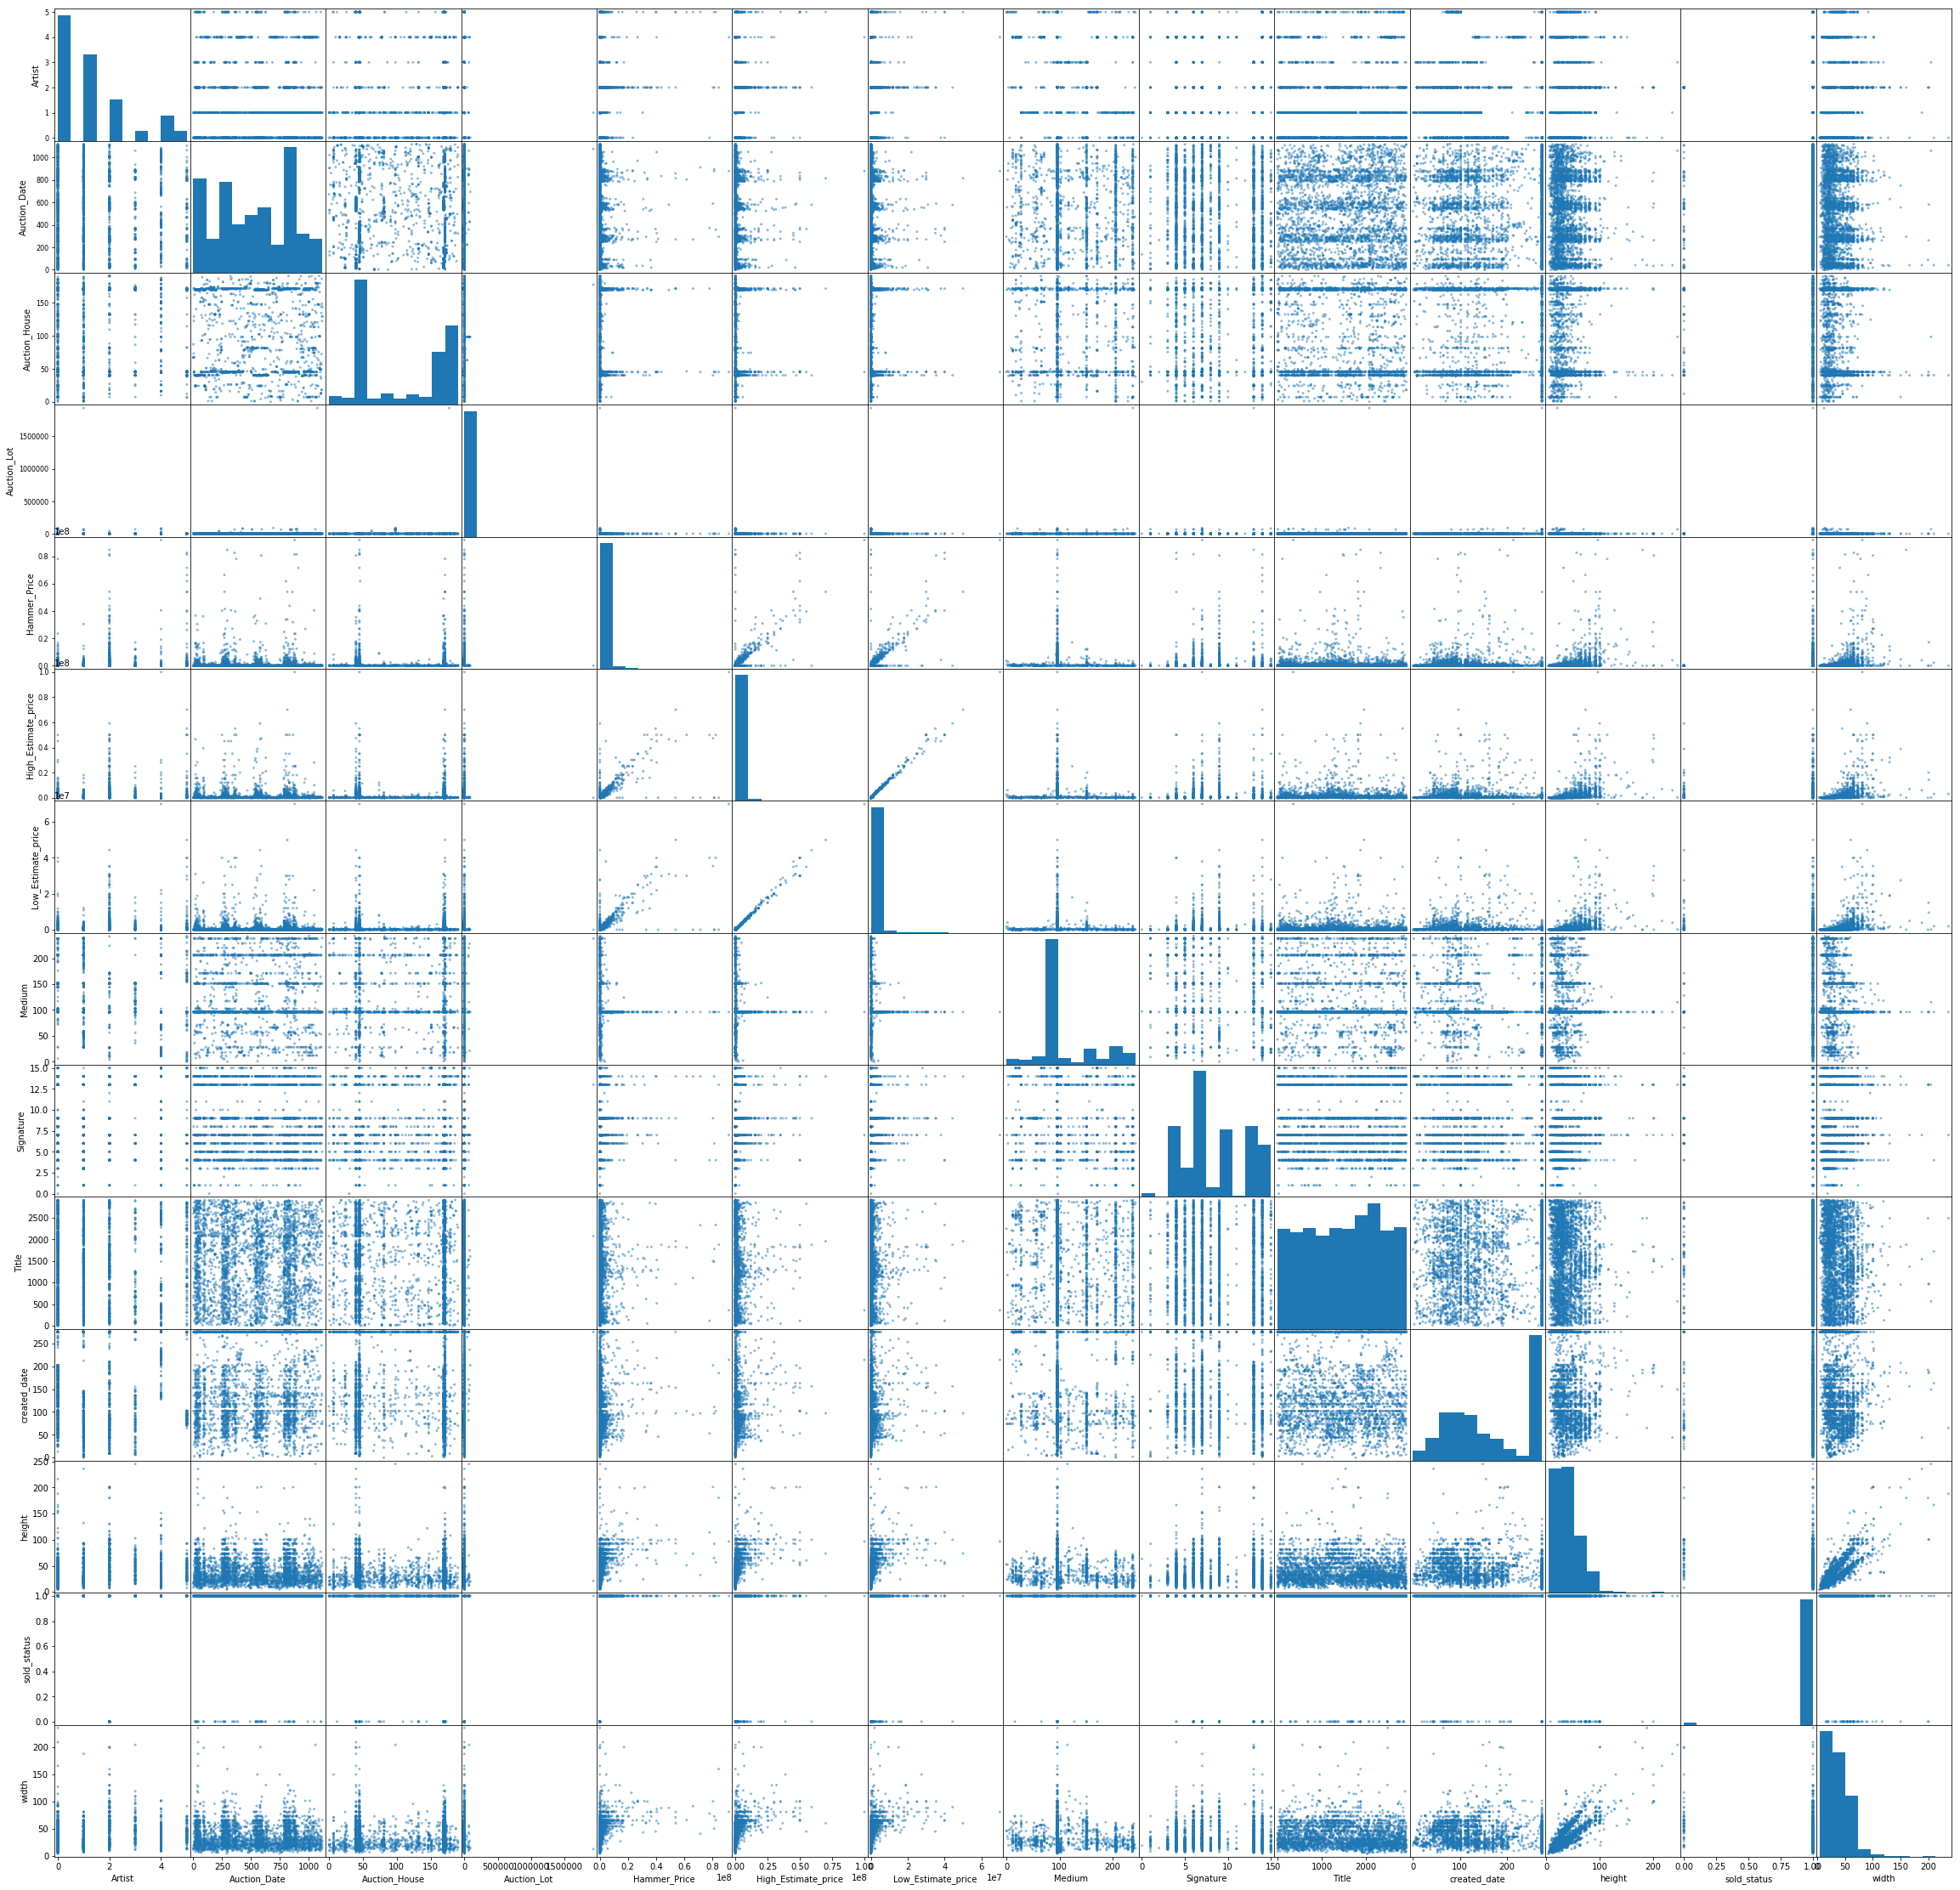

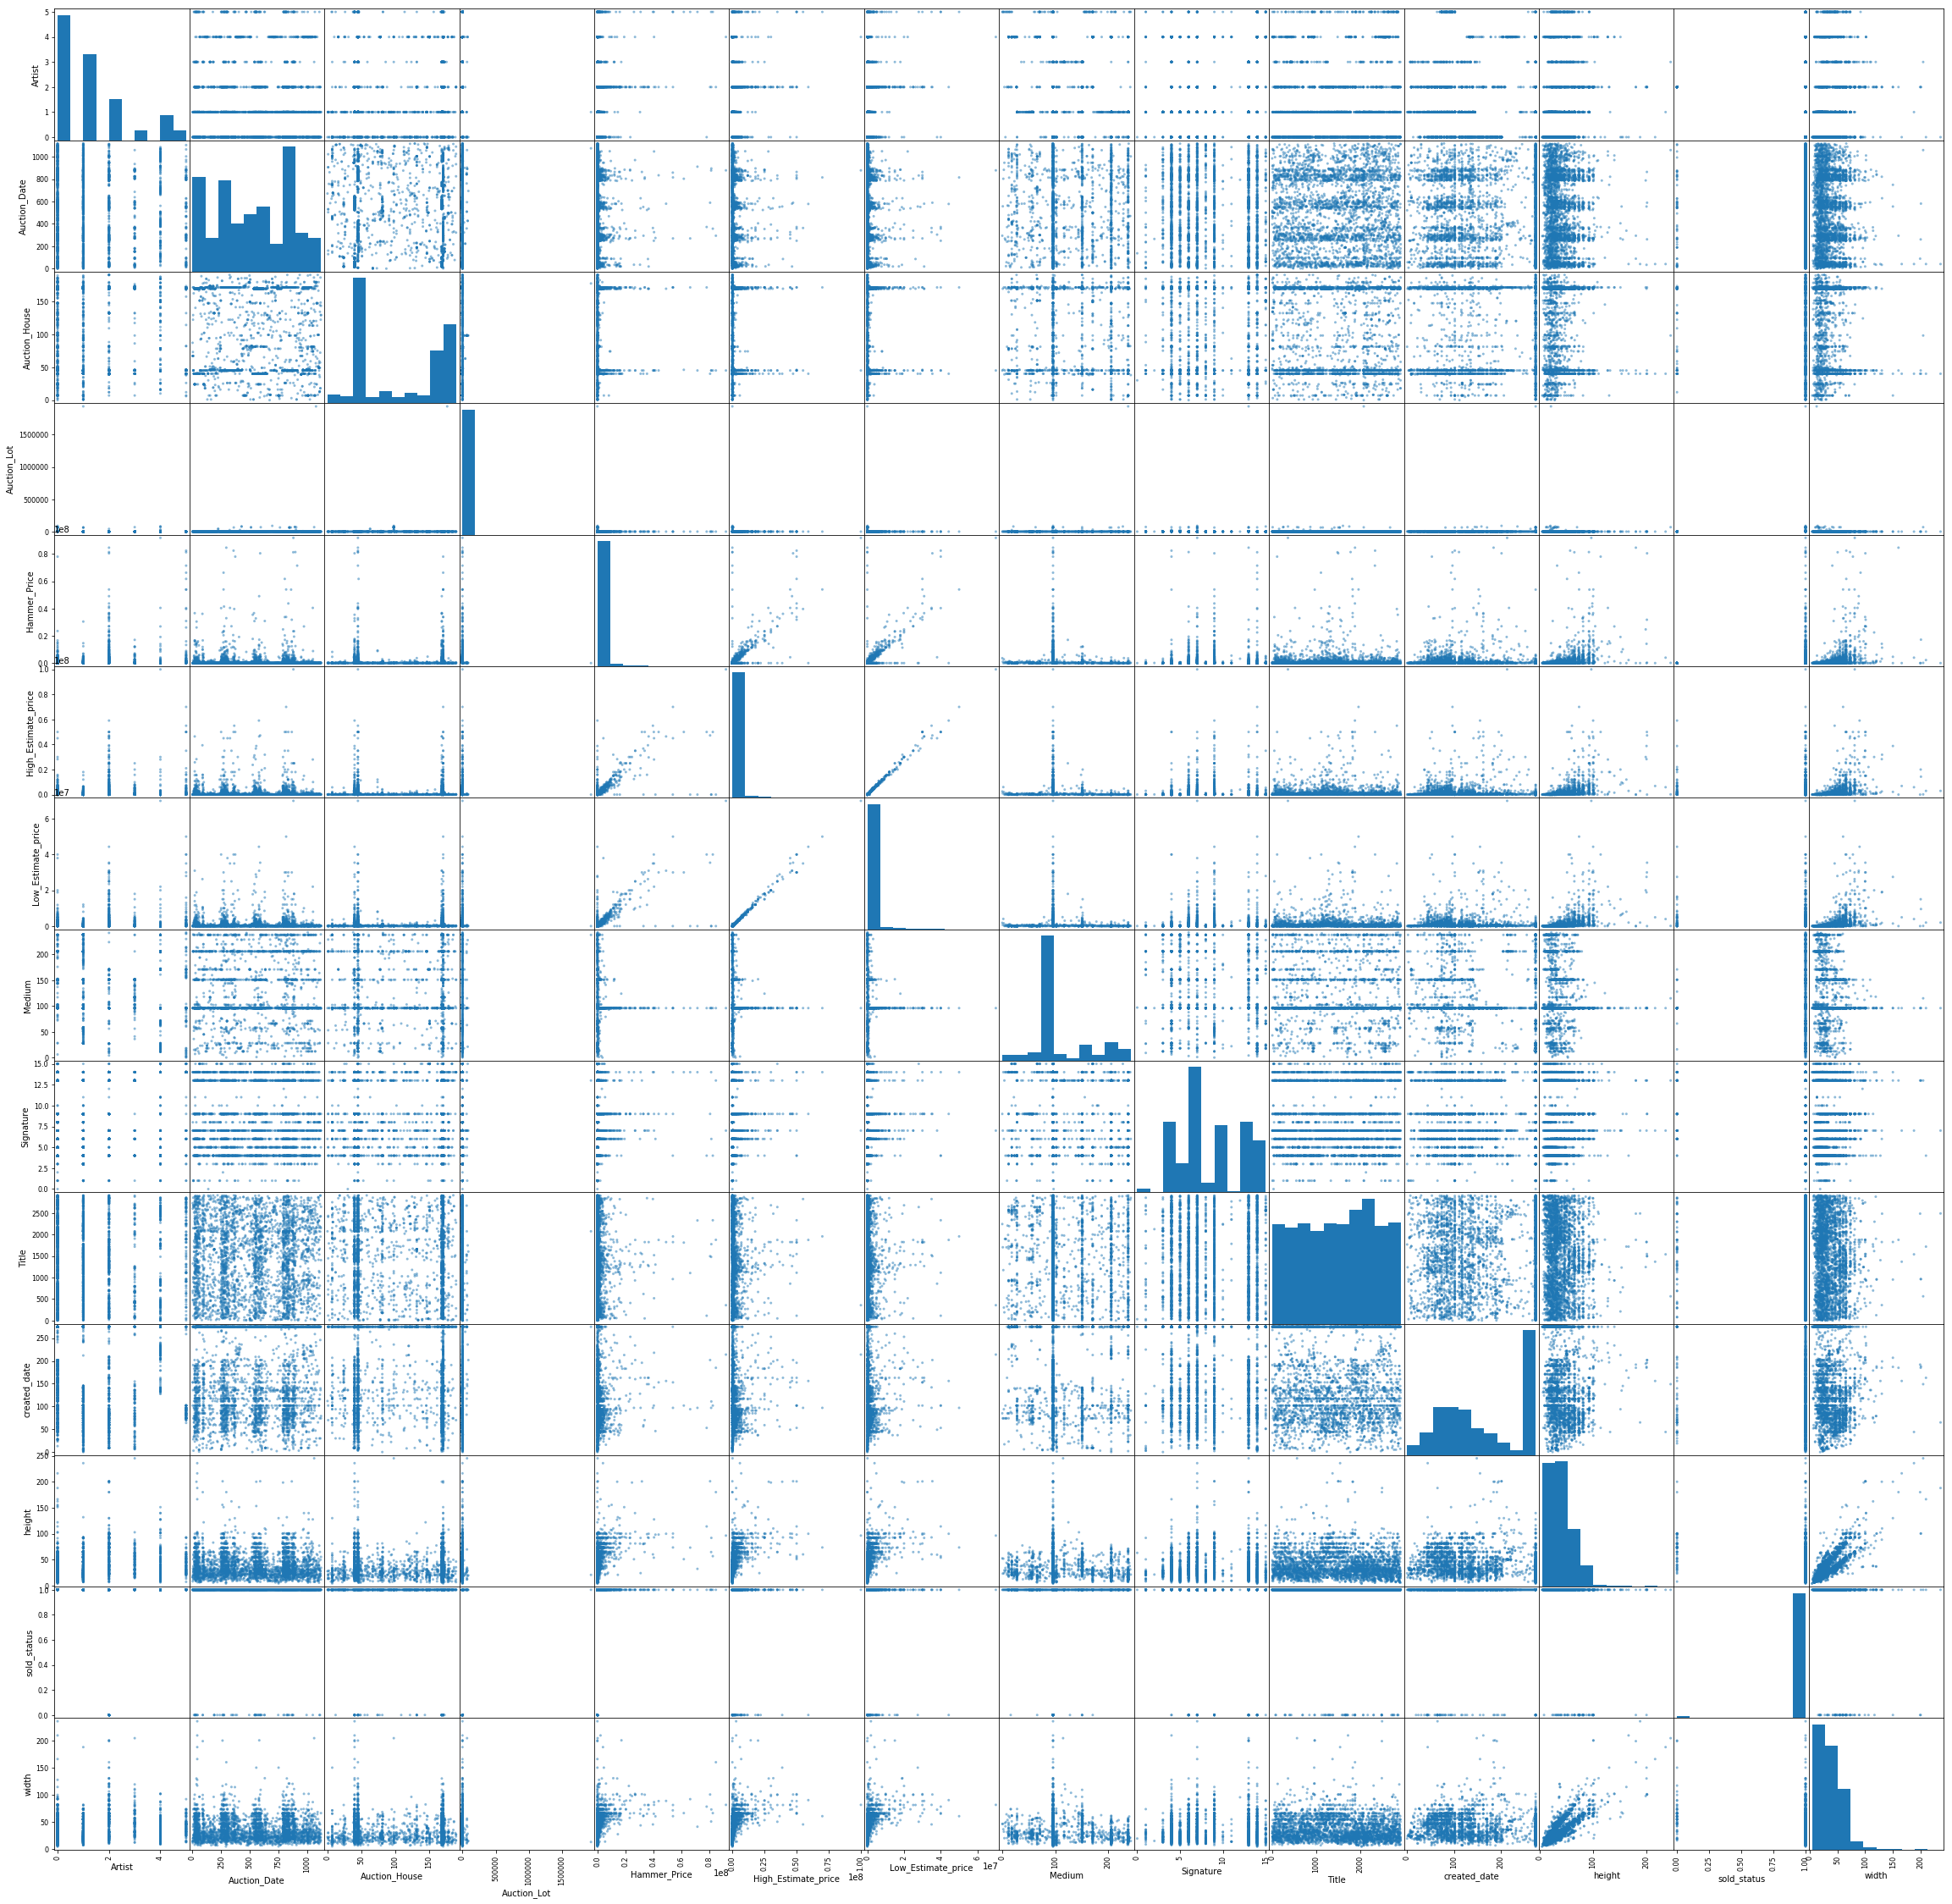

In [506]:
fig=pd.scatter_matrix(XX, figsize=(40, 40))#Hammer price has strong linear correlation with high and low estimate price
#plt.savefig(r"scatter.png")
plt.show()

## Try lasso and ridge

In [326]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_reg = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=3)
lasso_reg.fit(X111_train, Y111_train )

/Users/zhangruyue/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhangruyue/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhangruyue/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhangruyue/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

/Users/zhangruyue/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [327]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1e-15}
-6.11600109762e+12


In [330]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_reg = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=3)
ridge_reg.fit(X111_train, Y111_train )

GridSearchCV(cv=3, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [331]:
print(ridge_reg.best_params_)#lasso is better than ridge
print(ridge_reg.best_score_) #score no better than previous model both in r2 and mse neg mse lower the better

{'alpha': 20}
-6.11584374735e+12


## Decision Tree

In [135]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X22_train, Y22_train)

In [136]:
Y22_pred = clf2.predict(X22_test)
accuracy_score(Y22_test, Y22_pred)#high accuracy because most of the data sold unbalanced data

0.97064393939393945

In [138]:
pd.DataFrame(
    confusion_matrix(Y22_test, Y22_pred),
    columns=['Predicted Not sold', 'Predicted sold'],
    index=['True Not sold', 'True sold']
)

Predicted Not sold  Predicted sold
True Not sold                   3              19
True sold                      12            1022

In [469]:
Y22_pred=clf2.predict(X22_test)

In [472]:
from sklearn.metrics import classification_report
print(classification_report(Y22_test, Y22_pred))

             precision    recall  f1-score   support

          0       0.20      0.14      0.16        22
          1       0.98      0.99      0.99      1034

avg / total       0.97      0.97      0.97      1056



In [477]:
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
from sklearn import metrics
fpr1, tpr1, thresholds = metrics.roc_curve(Y22_test, Y22_pred)
roc_auc = metrics.auc(fpr1, tpr1)


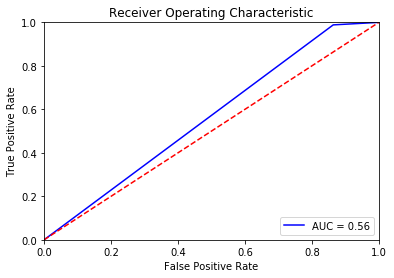

In [479]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')#can't classify very well
plt.show()

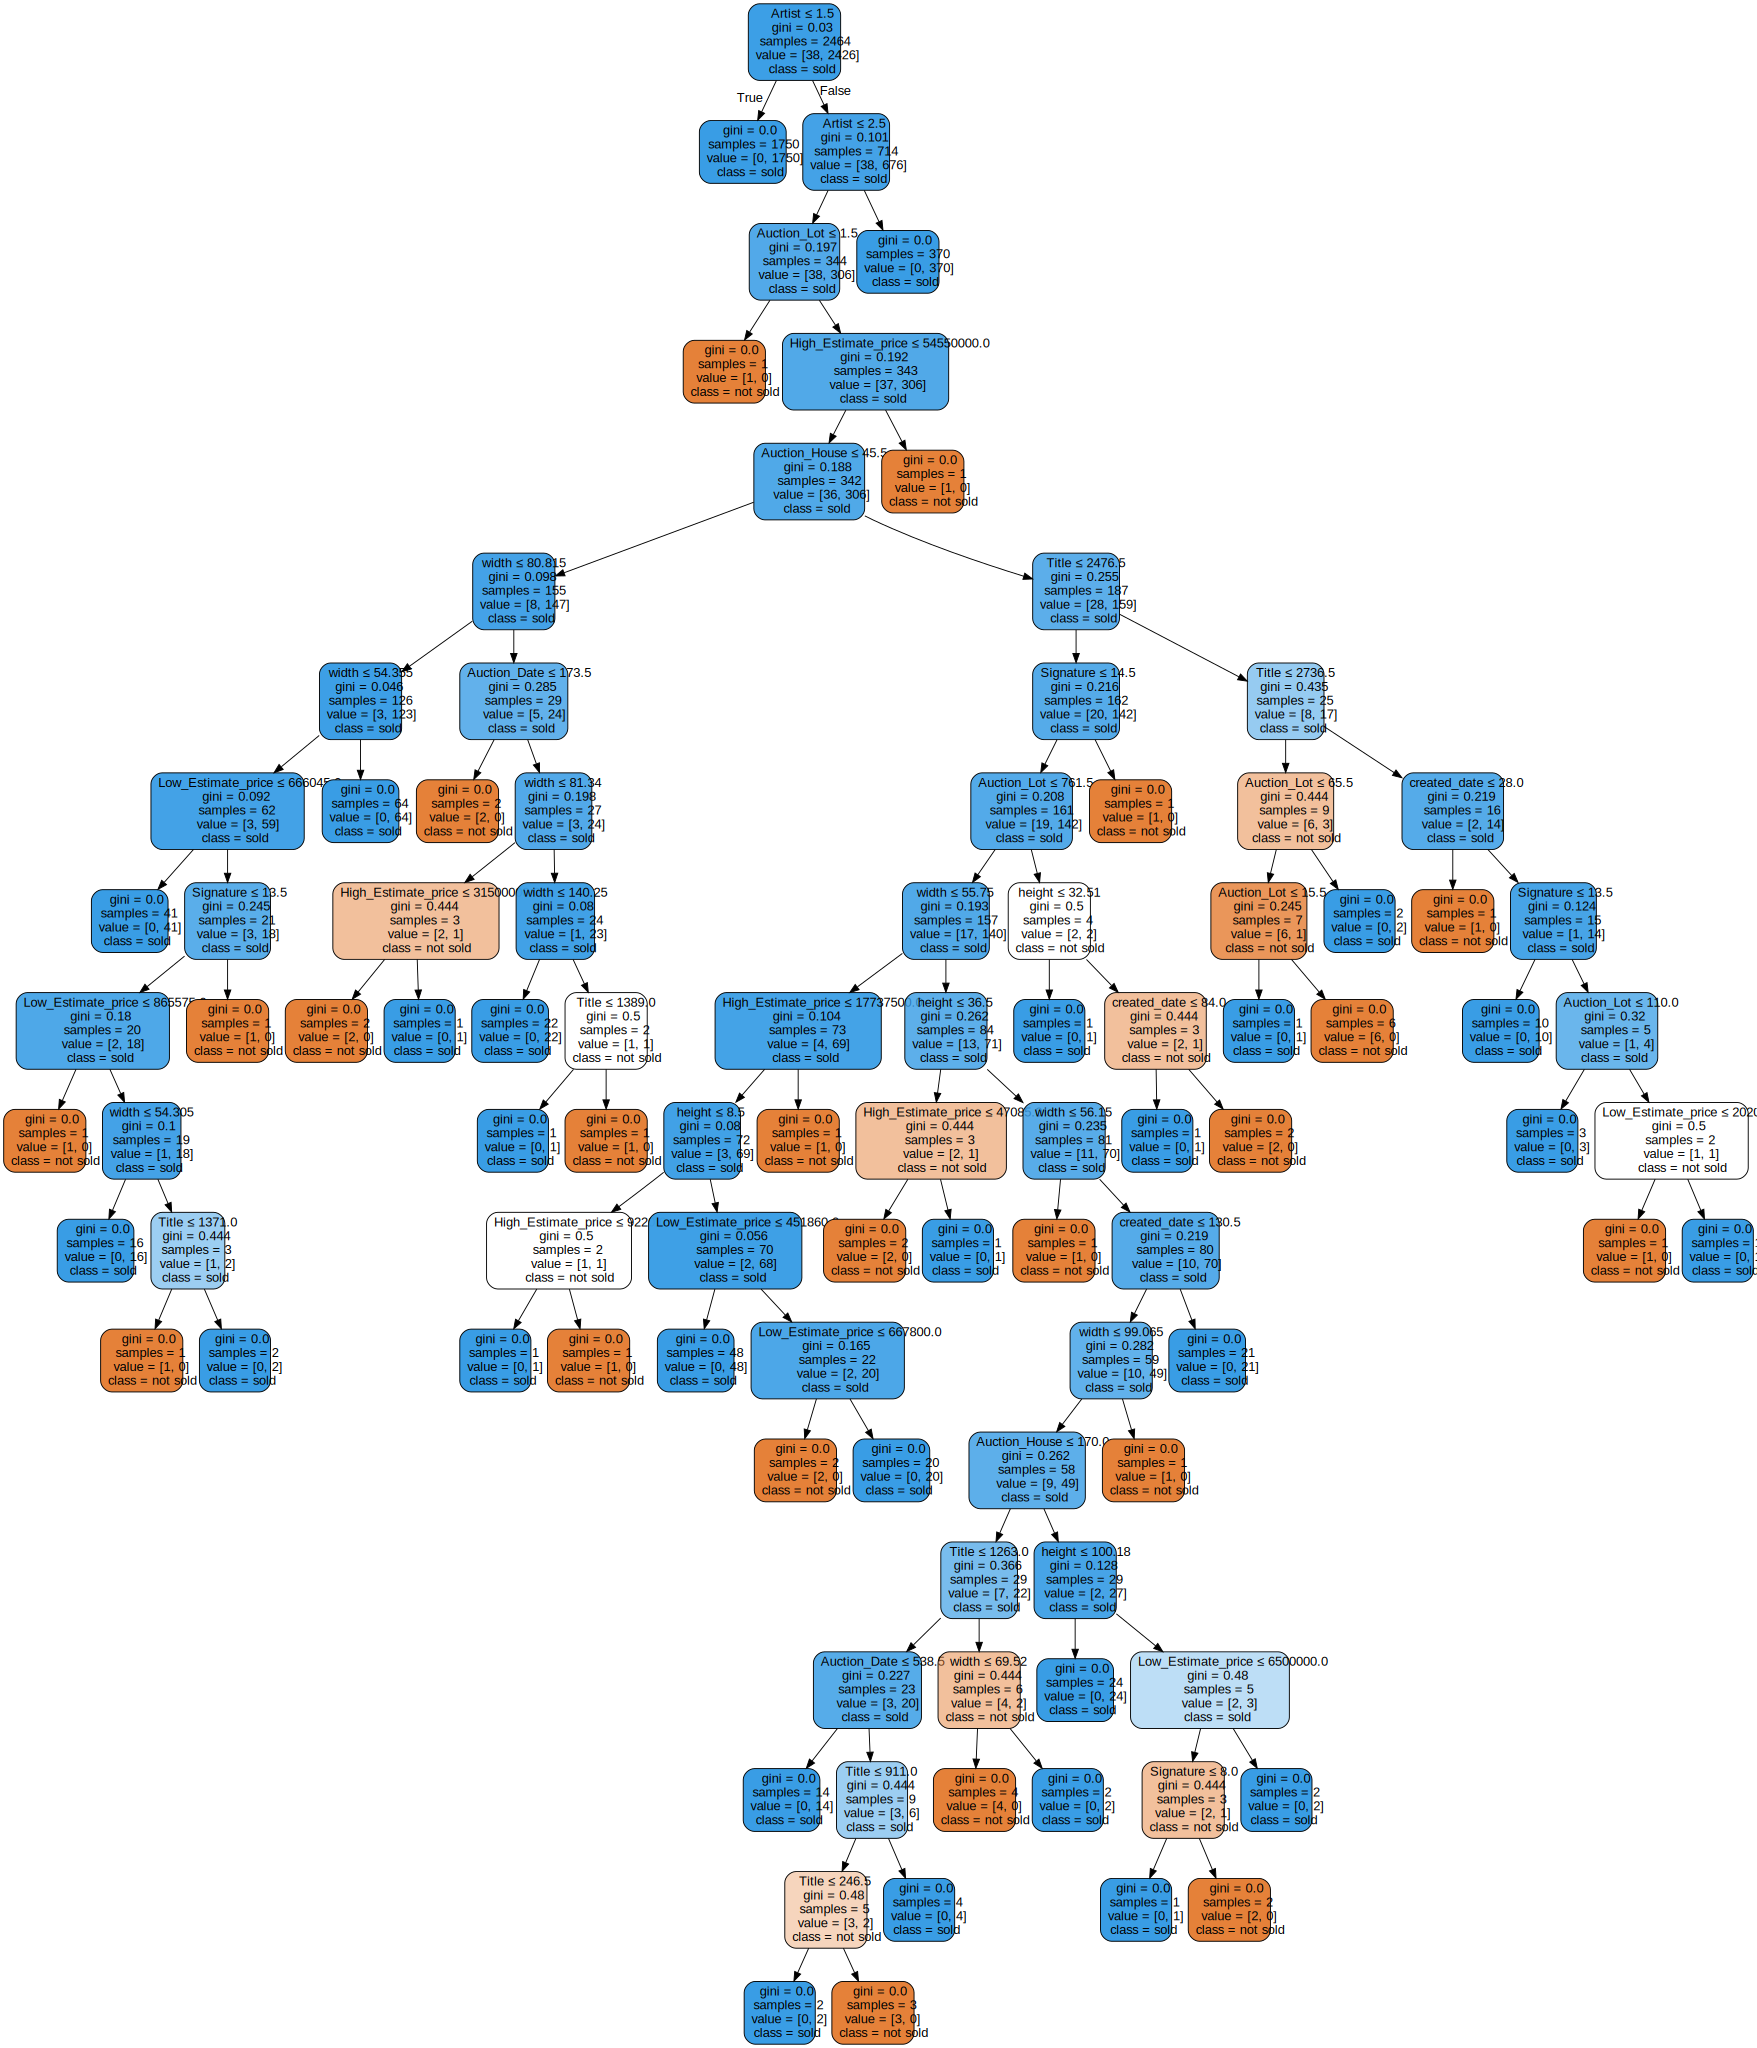

In [501]:
import graphviz #still feature artist gained most infomation
dot_data2 = tree.export_graphviz(clf2, out_file=None, 
                      feature_names=X22_train.columns,  
                      class_names=["not sold","sold"],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph2 = graphviz.Source(dot_data2) 
graph2